In [31]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
df.shape

(1338, 7)

In [38]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 1338
Number of Columns 7


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
# Encoding the categorical features

# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding region column
df.replace({'region':{'southeast':1,'southwest':2,'northeast':3,'northwest':4}},inplace=True)

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,4,21984.47061
4,32,0,28.880,0,1,4,3866.85520


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


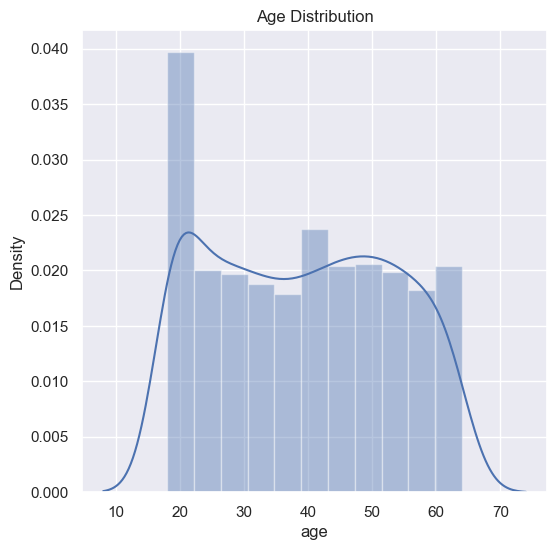

In [16]:
# Distribution of age value# 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()


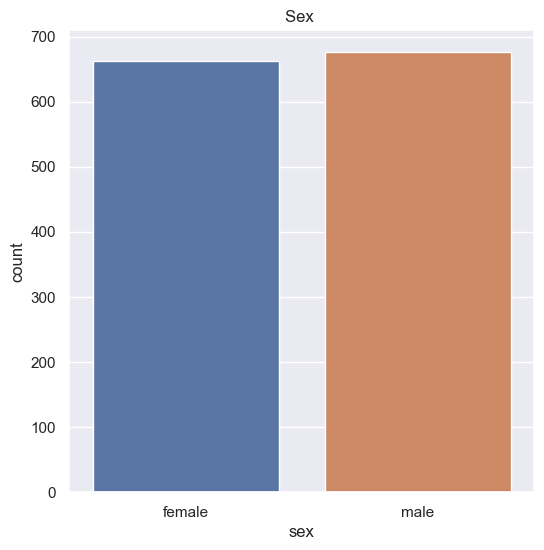

In [26]:
# Gender coloumn

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex ')
plt.show()

In [21]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

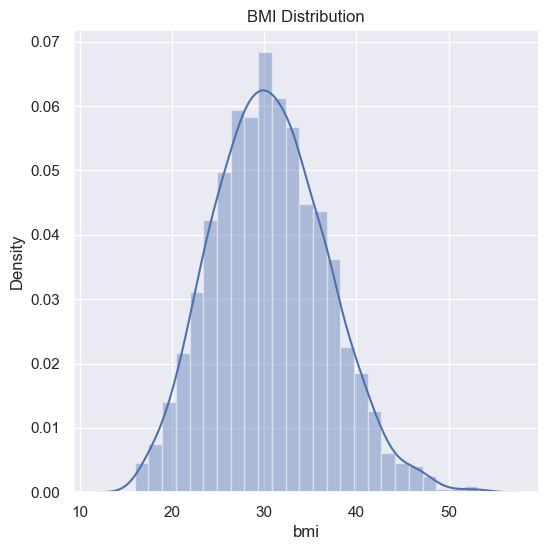

In [22]:
# bmi coloumn

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

In [23]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

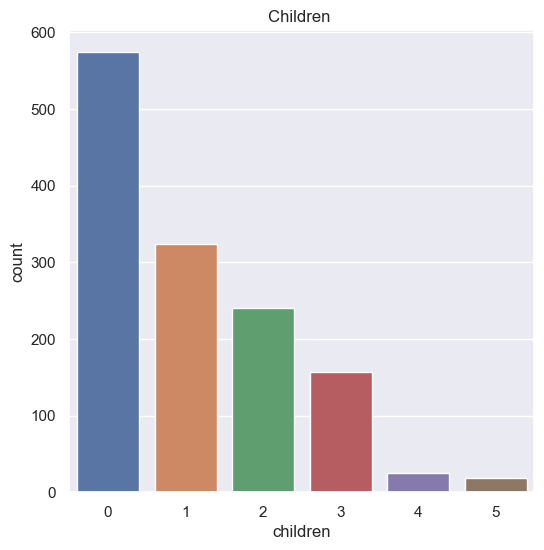

In [27]:
# Children coloumn

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children ')
plt.show()

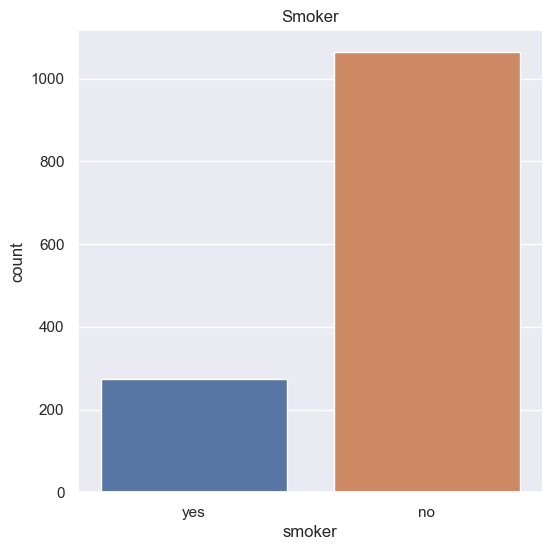

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

In [24]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

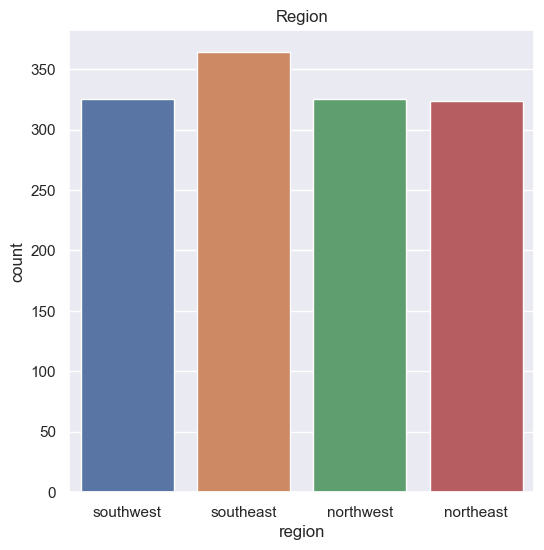

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

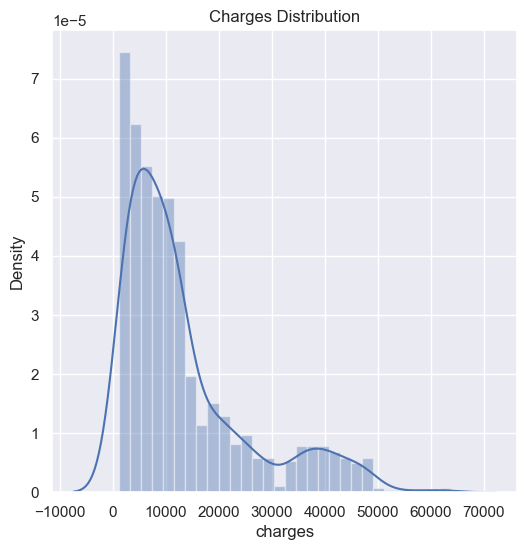

In [30]:
# Distribution of charges

plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [44]:
# Splitting the features and target

X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [45]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       2
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       4
4      32    0  28.880         0       1       4
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       4
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       2
1337   61    1  29.070         0       0       4

[1338 rows x 6 columns]


In [46]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [54]:
# Splitting data into Training and Testing data


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [55]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [56]:
# loading the linear regression model

regressor = LinearRegression()


In [57]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [58]:
training_data_prediction = regressor.predict(X_train)

In [59]:
# R squared value

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print ('R squared value : ',r2_train)

R squared value :  0.751505643411174


In [60]:
test_data_prediction = regressor.predict(X_test)

In [61]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print ('R squared value : ',r2_test)

R squared value :  0.7447273869684077


In [65]:
# Building a predictive system

input_data =(30,0,35.3,0,0,2)
# changing input data to numpy array

input_data_np = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_np.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[30783.86174497]
